In [30]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline
sns.set_style('whitegrid') # Outra opção de estilo

import warnings
warnings.filterwarnings('ignore')

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [3]:
train = pd.read_csv('data/train.csv')
test= pd.read_csv('data/test.csv')
submission = pd.read_csv('data/gender_submission.csv')

In [32]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [33]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [35]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex      

In [37]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
train.describe(include=['object'])

,Name,Sex,Embarked
count,891,891,891
unique,891,2,3
top,"Braund, Mr. Owen Harris",male,S
freq,1,577,646


In [43]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,29.599282,0.447368,0.392344,35.576535
std,120.810458,0.841838,12.703770,0.896760,0.981429,55.850103
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [42]:
test.describe(include=['object'])

,Name,Sex,Embarked
count,418,418,418
unique,418,2,3
top,"Kelly, Mr. James",male,S
freq,1,266,270


In [49]:
train_missing_values = train.isnull().sum()
train_missing_percent = (train_missing_values / len(train)) * 100

df_missing_train = pd.DataFrame({
                                'Missing Values': train_missing_values,
                                'Percentage': train_missing_percent
})

df_missing_train = df_missing_train[df_missing_train['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False)

if df_missing_train.empty:
    print("Não há valores ausentes no conjunto de dados de treinamento.")
else:
  display(df_missing_train)
print("-" * 50)

Não há valores ausentes no conjunto de dados de treinamento.
--------------------------------------------------


Analisando a variável alvo 'Survived' no conjunto de treino:

Contagem de Sobreviventes (0 = Não, 1 = Sim):
Survived
0    549
1    342
Name: count, dtype: int64

Proporção de Sobreviventes:
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


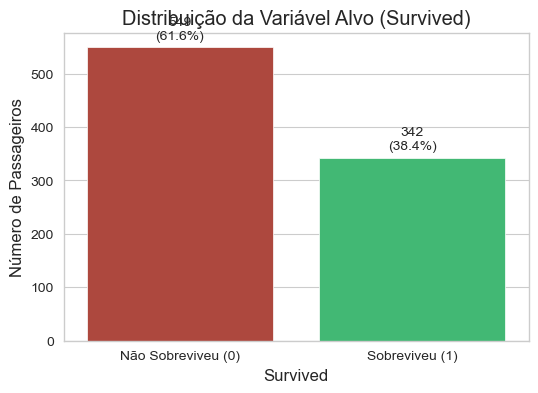

In [ ]:
# Verificaando a coluna Survived
if 'train' in globals() and 'Survived' in train.columns:
    print("Analisando a variável alvo 'Survived' no conjunto de treino:")
    
    # Contagem de valores
    print("\nContagem de Sobreviventes (0 = Não, 1 = Sim):")
    survival_counts = train['Survived'].value_counts()
    print(survival_counts)
    
    # Proporção de valores
    print("\nProporção de Sobreviventes:")
    survival_proportions = train['Survived'].value_counts(normalize=True) * 100
    print(survival_proportions)
    
    # Visualização gráfica
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Survived', data=train, palette=['#C0392B', '#2ECC71']) # Cores para Não/Sim
    plt.title('Distribuição da Variável Alvo (Survived)')
    plt.xticks([0, 1], ['Não Sobreviveu (0)', 'Sobreviveu (1)'])
    plt.ylabel('Número de Passageiros')
    
    # Adicionar anotações de contagem e porcentagem no gráfico
    for i, count in enumerate(survival_counts):
        proportion = survival_proportions.iloc[i]
        plt.text(i, count + 10, f"{count}\n({proportion:.1f}%)", ha='center', va='bottom')
        
    plt.show()
else:
    print("DataFrame 'train' ou coluna 'Survived' não encontrados. Verifique as células anteriores.")


--- Análise: Sex vs. Survived ---
Contagem:


Survived,0,1
Sex,,
female,81,233
male,468,109



Taxa de Sobrevivência (%):


,Não Sobreviveu (%),Sobreviveu (%)
Sex,,
female,25.796178,74.203822
male,81.109185,18.890815


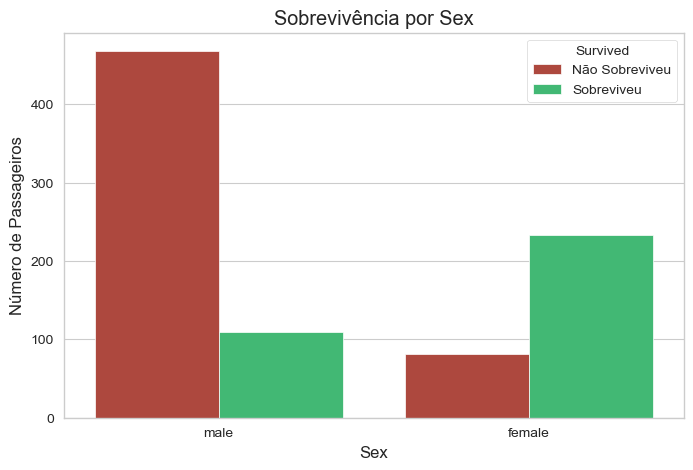


--- Análise: Pclass vs. Survived ---
Contagem:


Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119



Taxa de Sobrevivência (%):


,Não Sobreviveu (%),Sobreviveu (%)
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.763747,24.236253


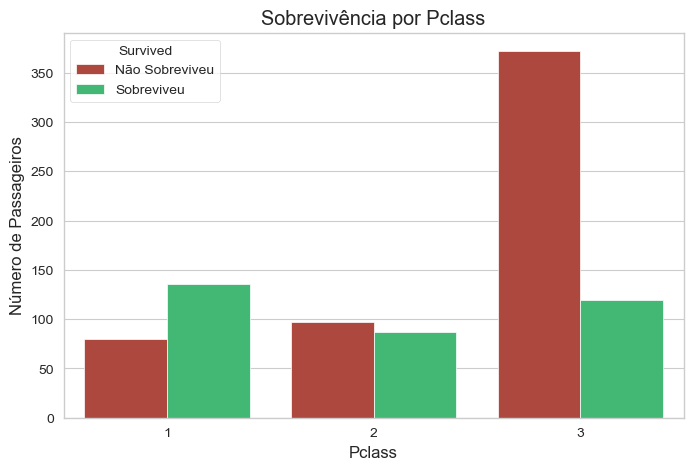


--- Análise: Embarked vs. Survived ---
Contagem:


Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,219



Taxa de Sobrevivência (%):


,Não Sobreviveu (%),Sobreviveu (%)
Embarked,,
C,44.642857,55.357143
Q,61.038961,38.961039
S,66.099071,33.900929


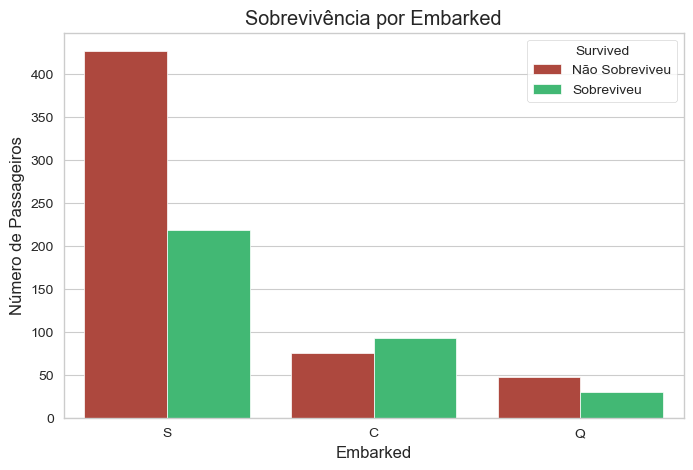


--- Análise: SibSp vs. Survived ---
Contagem:


Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0



Taxa de Sobrevivência (%):


,Não Sobreviveu (%),Sobreviveu (%)
SibSp,,
0,65.460526,34.539474
1,46.411483,53.588517
2,53.571429,46.428571
3,75.000000,25.000000
4,83.333333,16.666667
5,100.000000,0.000000
8,100.000000,0.000000


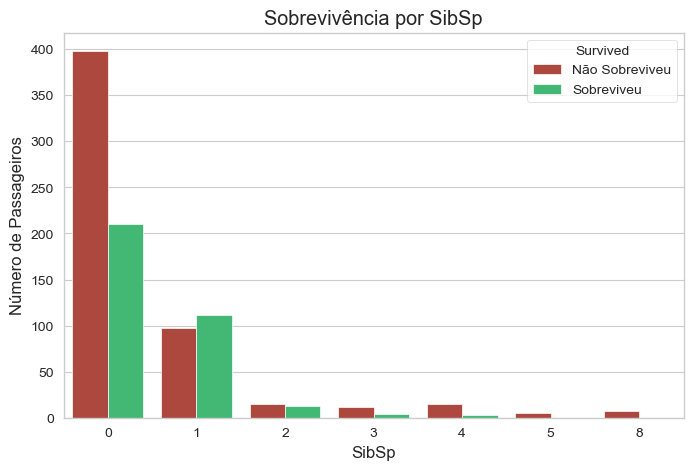


--- Análise: Parch vs. Survived ---
Contagem:


Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0



Taxa de Sobrevivência (%):


,Não Sobreviveu (%),Sobreviveu (%)
Parch,,
0,65.634218,34.365782
1,44.915254,55.084746
2,50.000000,50.000000
3,40.000000,60.000000
4,100.000000,0.000000
5,80.000000,20.000000
6,100.000000,0.000000


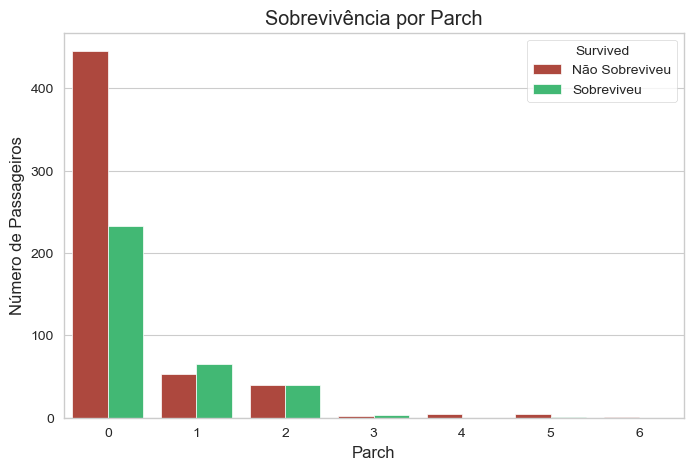

In [51]:
# Lista de features categóricas que queremos analisar contra 'Survived'
categorical_features = ['Sex', 'Pclass', 'Embarked', 'SibSp', 'Parch'] # Incluímos SibSp e Parch aqui, embora numéricos, podem ser tratados como categóricos para esta análise de contagem

if 'train' in globals() and 'Survived' in train.columns:
    for feature in categorical_features:
        if feature in train.columns:
            print(f"\n--- Análise: {feature} vs. Survived ---")

            # Tabela de contingência (contagem)
            print("Contagem:")
            contingency_table = pd.crosstab(train[feature], train['Survived'])
            display(contingency_table)

            # Tabela de contingência (proporção/taxa de sobrevivência por categoria)
            print("\nTaxa de Sobrevivência (%):")
            survival_rate_table = pd.crosstab(train[feature], train['Survived'], normalize='index') * 100
            survival_rate_table.columns = ['Não Sobreviveu (%)', 'Sobreviveu (%)']
            display(survival_rate_table)
            
            # Gráfico
            plt.figure(figsize=(8, 5))
            sns.countplot(x=feature, hue='Survived', data=train, palette=['#C0392B', '#2ECC71'])
            plt.title(f'Sobrevivência por {feature}')
            plt.ylabel('Número de Passageiros')
            
            # Adicionar legenda mais clara
            handles, labels = plt.gca().get_legend_handles_labels()
            plt.legend(handles, ['Não Sobreviveu', 'Sobreviveu'], title='Survived')
            
            plt.show()
        else:
            print(f"Atenção: Coluna '{feature}' não encontrada no DataFrame 'train'.")
else:
    print("DataFrame 'train' ou coluna 'Survived' não encontrados. Verifique as células anteriores.")

--- Análise: Age vs. Survived ---


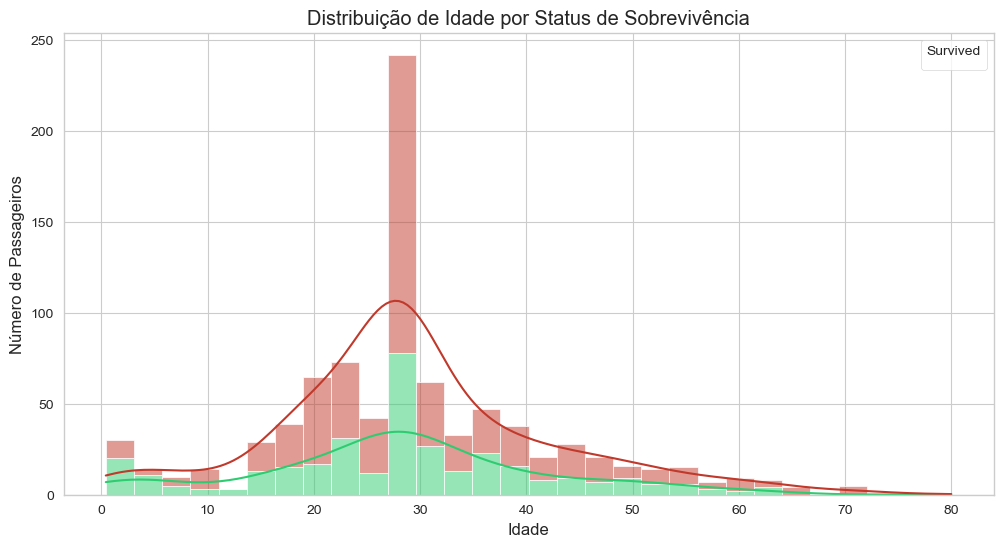

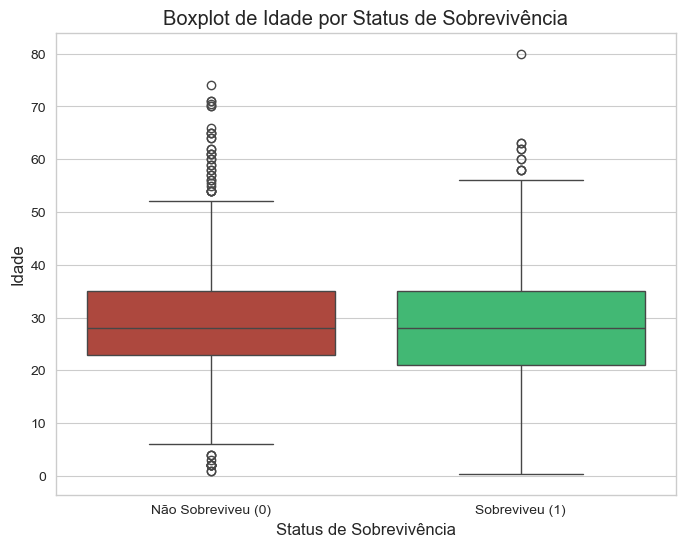


Estatísticas de Idade por Status de Sobrevivência:


,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,30.028233,12.499986,1.00,23.0,28.0,35.0,74.0
1,342.0,28.291433,13.764425,0.42,21.0,28.0,35.0,80.0


In [52]:
if 'train' in globals() and 'Survived' in train.columns and 'Age' in train.columns:
    print("--- Análise: Age vs. Survived ---")
    
    plt.figure(figsize=(12, 6))
    
    # Histograma de Idade para Sobreviventes e Não Sobreviventes
    sns.histplot(data=train, x='Age', hue='Survived', multiple='stack', kde=True, palette=['#C0392B', '#2ECC71'], bins=30)
    # 'multiple="stack"' empilha as barras. Outra opção é 'multiple="dodge"' para barras lado a lado.
    # 'kde=True' adiciona uma estimativa de densidade do kernel.
    
    plt.title('Distribuição de Idade por Status de Sobrevivência')
    plt.xlabel('Idade')
    plt.ylabel('Número de Passageiros')
    
    # Melhorar a legenda
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, ['Não Sobreviveu', 'Sobreviveu'], title='Survived')
    
    plt.show()
    
    # Outra visualização útil: Boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Survived', y='Age', data=train, palette=['#C0392B', '#2ECC71'])
    plt.title('Boxplot de Idade por Status de Sobrevivência')
    plt.xticks([0, 1], ['Não Sobreviveu (0)', 'Sobreviveu (1)'])
    plt.xlabel('Status de Sobrevivência')
    plt.ylabel('Idade')
    plt.show()
    
    # Estatísticas de idade por sobrevivência
    print("\nEstatísticas de Idade por Status de Sobrevivência:")
    display(train.groupby('Survived')['Age'].describe())

else:
    print("DataFrame 'train' ou colunas 'Survived'/'Age' não encontradas. Verifique as células anteriores.")

--- Análise: Fare vs. Survived ---


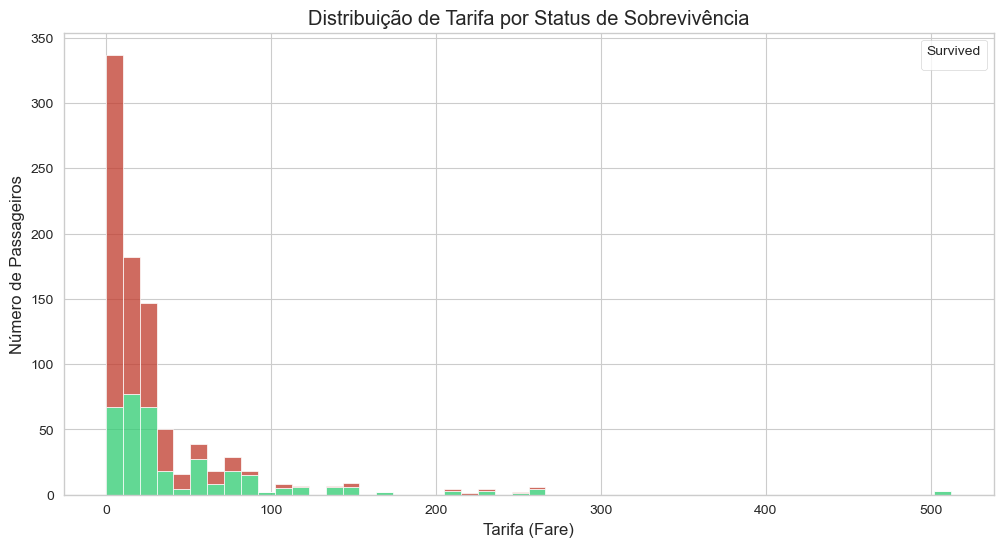

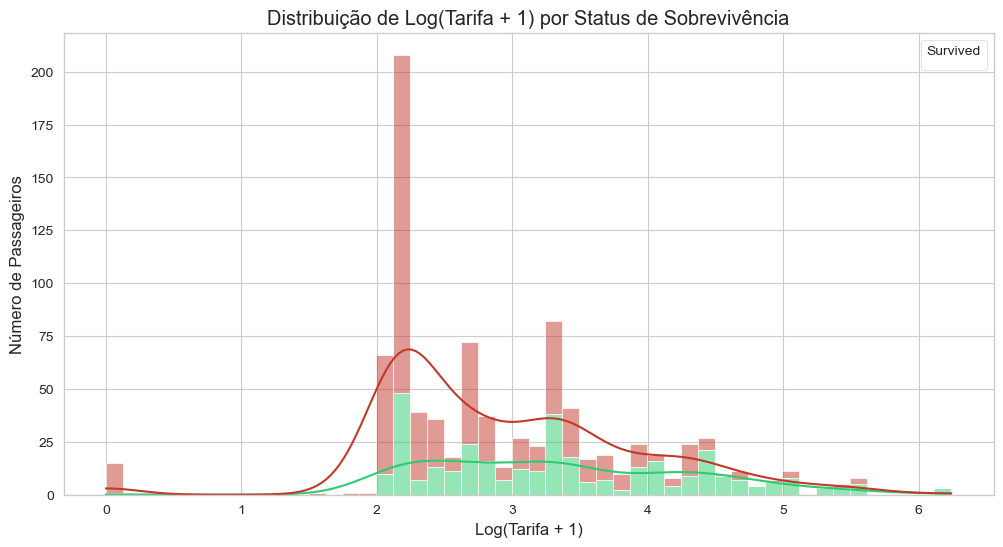

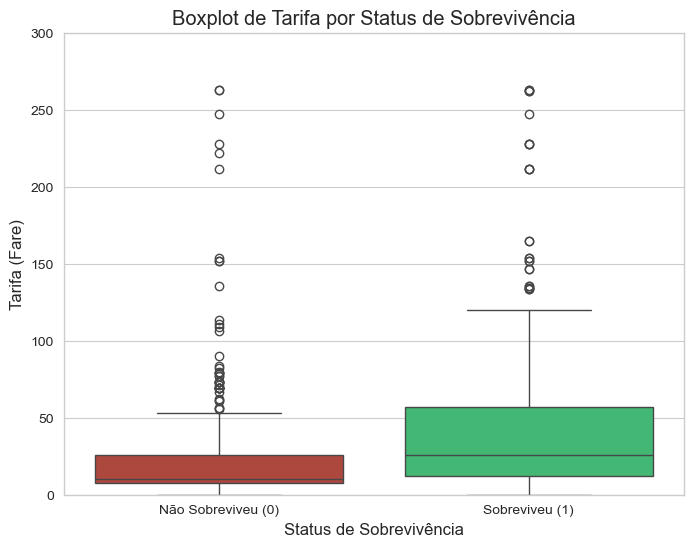


Estatísticas de Tarifa por Status de Sobrevivência:


,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


In [53]:
if 'train' in globals() and 'Survived' in train.columns and 'Fare' in train.columns:
    print("--- Análise: Fare vs. Survived ---")
    
    plt.figure(figsize=(12, 6))
    
    # Histograma de Tarifa para Sobreviventes e Não Sobreviventes
    # Devido à grande assimetria da Fare, pode ser útil aplicar uma transformação (ex: log) para melhor visualização,
    # mas vamos ver primeiro a distribuição original.
    sns.histplot(data=train, x='Fare', hue='Survived', multiple='stack', kde=False, palette=['#C0392B', '#2ECC71'], bins=50) # Aumentamos os bins
    plt.title('Distribuição de Tarifa por Status de Sobrevivência')
    plt.xlabel('Tarifa (Fare)')
    plt.ylabel('Número de Passageiros')
    
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, ['Não Sobreviveu', 'Sobreviveu'], title='Survived')
    
    plt.show()

    # A distribuição da tarifa é muito assimétrica (skewed).
    # Vamos tentar visualizar com uma transformação logarítmica para ver melhor as tarifas mais baixas.
    # Adicionamos 1 para evitar log(0) caso haja tarifas zero (o que não é o caso aqui, mas é uma boa prática).
    train['Fare_log'] = np.log1p(train['Fare']) # log1p(x) = log(1+x)
    
    plt.figure(figsize=(12, 6))
    sns.histplot(data=train, x='Fare_log', hue='Survived', multiple='stack', kde=True, palette=['#C0392B', '#2ECC71'], bins=50)
    plt.title('Distribuição de Log(Tarifa + 1) por Status de Sobrevivência')
    plt.xlabel('Log(Tarifa + 1)')
    plt.ylabel('Número de Passageiros')

    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, ['Não Sobreviveu', 'Sobreviveu'], title='Survived')
    
    plt.show()
    
    # Remover a coluna temporária, se desejar, ou mantê-la para uso posterior
    # train = train.drop('Fare_log', axis=1) # Descomente se quiser remover agora

    # Boxplot de Tarifa (original) por Status de Sobrevivência
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Survived', y='Fare', data=train, palette=['#C0392B', '#2ECC71'])
    plt.title('Boxplot de Tarifa por Status de Sobrevivência')
    plt.xticks([0, 1], ['Não Sobreviveu (0)', 'Sobreviveu (1)'])
    plt.xlabel('Status de Sobrevivência')
    plt.ylabel('Tarifa (Fare)')
    plt.ylim(0, 300) # Limitar o eixo Y para melhor visualização, pois há outliers muito altos
    plt.show()

    # Estatísticas de tarifa por sobrevivência
    print("\nEstatísticas de Tarifa por Status de Sobrevivência:")
    display(train.groupby('Survived')['Fare'].describe())

else:
    print("DataFrame 'train' ou colunas 'Survived'/'Fare' não encontradas. Verifique as células anteriores.")

In [59]:
# Criar cópias dos DataFrames para pré-processamento
# Isso garante que não modificaremos os DataFrames originais carregados do CSV
train_proc = train.copy()
test_proc = test.copy()

# Vamos remover a coluna 'Fare_log' se ela ainda existir no train_proc, pois foi apenas para visualização
if 'Fare_log' in train_proc.columns:
    train_proc = train_proc.drop('Fare_log', axis=1)

print("Cópias 'train_proc' e 'test_proc' criadas.")

# Relembrar valores ausentes
print("\nValores ausentes em train_proc (antes do tratamento):")
total_ausentes_train = train_proc.isnull().sum()
percentual_ausentes_train = (train_proc.isnull().sum() / len(train_proc)) * 100
df_ausentes_train = pd.DataFrame({'Total Ausentes': total_ausentes_train, 'Percentual Ausentes (%)': percentual_ausentes_train})
display(df_ausentes_train[df_ausentes_train['Total Ausentes'] > 0].sort_values(by='Total Ausentes', ascending=False))

print("\nValores ausentes em test_proc (antes do tratamento):")
total_ausentes_test = test_proc.isnull().sum()
percentual_ausentes_test = (test_proc.isnull().sum() / len(test_proc)) * 100
df_ausentes_test = pd.DataFrame({'Total Ausentes': total_ausentes_test, 'Percentual Ausentes (%)': percentual_ausentes_test})
display(df_ausentes_test[df_ausentes_test['Total Ausentes'] > 0].sort_values(by='Total Ausentes', ascending=False))

print("\n--- Estratégia Inicial para Valores Ausentes ---")
print("1. Cabin: Muitos valores ausentes (>70%). Estratégia: Remover a coluna por enquanto ou criar uma feature 'HasCabin'.")
print("2. Age: Cerca de 20% ausentes. Estratégia: Imputar com a mediana (robusta a outliers) ou uma técnica mais avançada (ex: predição baseada em outras features). Começaremos com a mediana.")
print("3. Embarked (train_proc): Apenas 2 ausentes. Estratégia: Imputar com a moda (valor mais frequente).")
print("4. Fare (test_proc): Apenas 1 ausente. Estratégia: Imputar com a mediana da tarifa do conjunto de teste (ou treino, idealmente treino para evitar data leakage, mas para um valor a diferença é mínima).")

Cópias 'train_proc' e 'test_proc' criadas.

Valores ausentes em train_proc (antes do tratamento):


,Total Ausentes,Percentual Ausentes (%)



Valores ausentes em test_proc (antes do tratamento):


,Total Ausentes,Percentual Ausentes (%)



--- Estratégia Inicial para Valores Ausentes ---
1. Cabin: Muitos valores ausentes (>70%). Estratégia: Remover a coluna por enquanto ou criar uma feature 'HasCabin'.
2. Age: Cerca de 20% ausentes. Estratégia: Imputar com a mediana (robusta a outliers) ou uma técnica mais avançada (ex: predição baseada em outras features). Começaremos com a mediana.
3. Embarked (train_proc): Apenas 2 ausentes. Estratégia: Imputar com a moda (valor mais frequente).
4. Fare (test_proc): Apenas 1 ausente. Estratégia: Imputar com a mediana da tarifa do conjunto de teste (ou treino, idealmente treino para evitar data leakage, mas para um valor a diferença é mínima).


In [60]:
# Guardar PassengerId do conjunto de teste para a submissão final
# Fazemos isso antes de qualquer drop de colunas no test_proc.
if 'PassengerId' in test_proc.columns:
    passenger_id_test = test_proc['PassengerId'].copy()
    print("PassengerId do conjunto de teste guardado.")
else:
    print("Atenção: Coluna 'PassengerId' não encontrada em test_proc. Verifique se ela já não foi removida.")
    # Você precisará garantir que passenger_id_test seja definido corretamente se isso acontecer.


# --- 1. Tratamento de 'Cabin' ---
# Remover a coluna 'Cabin' se ela existir.
columns_to_drop_cabin = ['Cabin']
for col in columns_to_drop_cabin:
    if col in train_proc.columns:
        train_proc = train_proc.drop(col, axis=1)
        print(f"Coluna '{col}' removida de train_proc.")
    else:
        print(f"Coluna '{col}' não encontrada em train_proc (provavelmente já removida).")
        
    if col in test_proc.columns:
        test_proc = test_proc.drop(col, axis=1)
        print(f"Coluna '{col}' removida de test_proc.")
    else:
        print(f"Coluna '{col}' não encontrada em test_proc (provavelmente já removida).")


# --- 2. Tratamento de 'Embarked' (no train_proc) ---
if 'Embarked' in train_proc.columns:
    if train_proc['Embarked'].isnull().any():
        moda_embarked_train = train_proc['Embarked'].mode()[0]
        train_proc['Embarked'].fillna(moda_embarked_train, inplace=True)
        print(f"Valores ausentes em 'Embarked' (train_proc) preenchidos com a moda: '{moda_embarked_train}'.")
    else:
        print("'Embarked' (train_proc) não possui valores ausentes para preencher.")
else:
    print("Coluna 'Embarked' não encontrada em train_proc.")


# --- 3. Tratamento de 'Fare' (no test_proc) ---
if 'Fare' in test_proc.columns:
    if test_proc['Fare'].isnull().any():
        # Usaremos a mediana do CONJUNTO DE TREINO para preencher o teste, para evitar data leakage.
        mediana_fare_train = train_proc['Fare'].median() # Calcula a mediana no train_proc
        test_proc['Fare'].fillna(mediana_fare_train, inplace=True)
        print(f"Valores ausentes em 'Fare' (test_proc) preenchidos com a mediana do TREINO: {mediana_fare_train:.2f}.")
    else:
        print("'Fare' (test_proc) não possui valores ausentes para preencher.")
else:
    print("Coluna 'Fare' não encontrada em test_proc.")


# Verificar os valores ausentes restantes
print("\nValores ausentes em train_proc (após tratamento inicial):")
ausentes_train_proc = train_proc.isnull().sum()
display(ausentes_train_proc[ausentes_train_proc > 0])

print("\nValores ausentes em test_proc (após tratamento inicial):")
ausentes_test_proc = test_proc.isnull().sum()
display(ausentes_test_proc[ausentes_test_proc > 0])

PassengerId do conjunto de teste guardado.
Coluna 'Cabin' não encontrada em train_proc (provavelmente já removida).
Coluna 'Cabin' não encontrada em test_proc (provavelmente já removida).
'Embarked' (train_proc) não possui valores ausentes para preencher.
'Fare' (test_proc) não possui valores ausentes para preencher.

Valores ausentes em train_proc (após tratamento inicial):


Series([], dtype: int64)


Valores ausentes em test_proc (após tratamento inicial):


Series([], dtype: int64)

In [61]:
print("--- Verificando Valores Ausentes em 'Age' ---")

print("\nDataFrame Original 'train':")
if 'train' in globals() and 'Age' in train.columns:
    print(f"Valores ausentes em 'Age' (train): {train['Age'].isnull().sum()}")
else:
    print("'train' ou 'train['Age']' não encontrado.")

print("\nDataFrame Original 'test':")
if 'test' in globals() and 'Age' in test.columns:
    print(f"Valores ausentes em 'Age' (test): {test['Age'].isnull().sum()}")
else:
    print("'test' ou 'test['Age']' não encontrado.")

print("\nDataFrame Processado 'train_proc':")
if 'train_proc' in globals() and 'Age' in train_proc.columns:
    print(f"Valores ausentes em 'Age' (train_proc): {train_proc['Age'].isnull().sum()}")
else:
    print("'train_proc' ou 'train_proc['Age']' não encontrado.")

print("\nDataFrame Processado 'test_proc':")
if 'test_proc' in globals() and 'Age' in test_proc.columns:
    print(f"Valores ausentes em 'Age' (test_proc): {test_proc['Age'].isnull().sum()}")
else:
    print("'test_proc' ou 'test_proc['Age']' não encontrado.")

# Vamos também ver as primeiras linhas de Age para ter uma ideia dos valores
if 'train_proc' in globals() and 'Age' in train_proc.columns:
    print("\nPrimeiras 5 idades em train_proc:")
    display(train_proc['Age'].head())
if 'test_proc' in globals() and 'Age' in test_proc.columns:
    print("\nPrimeiras 5 idades em test_proc:")
    display(test_proc['Age'].head())

--- Verificando Valores Ausentes em 'Age' ---

DataFrame Original 'train':
Valores ausentes em 'Age' (train): 0

DataFrame Original 'test':
Valores ausentes em 'Age' (test): 0

DataFrame Processado 'train_proc':
Valores ausentes em 'Age' (train_proc): 0

DataFrame Processado 'test_proc':
Valores ausentes em 'Age' (test_proc): 0

Primeiras 5 idades em train_proc:


0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64


Primeiras 5 idades em test_proc:


0    34.5
1    47.0
2    62.0
3    27.0
4    22.0
Name: Age, dtype: float64

Criando features 'FamilySize' e 'IsAlone'...
'FamilySize' criada para train_proc.
'FamilySize' criada para test_proc.
'IsAlone' criada para train_proc.
'IsAlone' criada para test_proc.

Primeiras linhas de train_proc com as novas features:


,SibSp,Parch,FamilySize,IsAlone
0,1,0,2,0
1,1,0,2,0
2,0,0,1,1
3,1,0,2,0
4,0,0,1,1



Primeiras linhas de test_proc com as novas features:


,SibSp,Parch,FamilySize,IsAlone
0,0,0,1,1
1,1,0,2,0
2,0,0,1,1
3,0,0,1,1
4,1,1,3,0



--- Análise: FamilySize vs. Survived ---


Survived,0,1
FamilySize,,
1,69.646182,30.353818
2,44.720497,55.279503
3,42.156863,57.843137
4,27.586207,72.413793
5,80.000000,20.000000
6,86.363636,13.636364
7,66.666667,33.333333
8,100.000000,0.000000
11,100.000000,0.000000


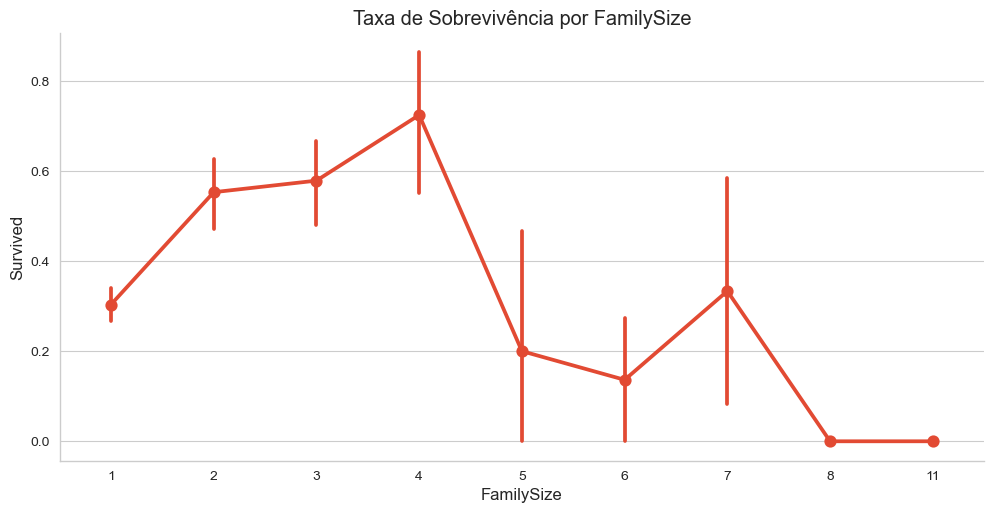


--- Análise: IsAlone vs. Survived ---


Survived,0,1
IsAlone,,
0,49.435028,50.564972
1,69.646182,30.353818


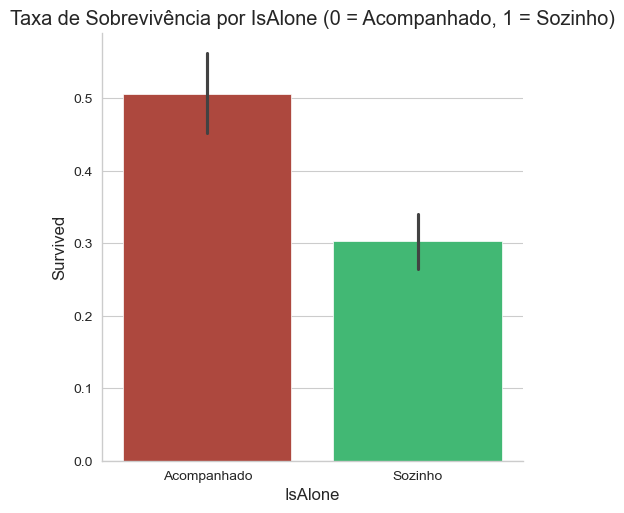

In [62]:
# Certifique-se de que train_proc e test_proc estão definidos
if 'train_proc' not in globals() or 'test_proc' not in globals():
    print("ERRO: DataFrames 'train_proc' ou 'test_proc' não definidos. Execute as células anteriores.")
else:
    print("Criando features 'FamilySize' e 'IsAlone'...")

    # Criar 'FamilySize'
    # Somamos SibSp, Parch e 1 (para o próprio passageiro)
    if 'SibSp' in train_proc.columns and 'Parch' in train_proc.columns:
        train_proc['FamilySize'] = train_proc['SibSp'] + train_proc['Parch'] + 1
        print("'FamilySize' criada para train_proc.")
    else:
        print("Atenção: Colunas 'SibSp' ou 'Parch' não encontradas em train_proc para criar 'FamilySize'.")

    if 'SibSp' in test_proc.columns and 'Parch' in test_proc.columns:
        test_proc['FamilySize'] = test_proc['SibSp'] + test_proc['Parch'] + 1
        print("'FamilySize' criada para test_proc.")
    else:
        print("Atenção: Colunas 'SibSp' ou 'Parch' não encontradas em test_proc para criar 'FamilySize'.")

    # Criar 'IsAlone'
    if 'FamilySize' in train_proc.columns:
        train_proc['IsAlone'] = 0 # Inicializa com 0 (não está sozinho)
        train_proc.loc[train_proc['FamilySize'] == 1, 'IsAlone'] = 1 # Define 1 se FamilySize for 1
        print("'IsAlone' criada para train_proc.")
    else:
        print("Atenção: Coluna 'FamilySize' não encontrada em train_proc para criar 'IsAlone'.")

    if 'FamilySize' in test_proc.columns:
        test_proc['IsAlone'] = 0 # Inicializa com 0
        test_proc.loc[test_proc['FamilySize'] == 1, 'IsAlone'] = 1 # Define 1 se FamilySize for 1
        print("'IsAlone' criada para test_proc.")
    else:
        print("Atenção: Coluna 'FamilySize' não encontrada em test_proc para criar 'IsAlone'.")

    # Visualizar as novas features e as colunas originais
    print("\nPrimeiras linhas de train_proc com as novas features:")
    if all(col in train_proc.columns for col in ['SibSp', 'Parch', 'FamilySize', 'IsAlone']):
        display(train_proc[['SibSp', 'Parch', 'FamilySize', 'IsAlone']].head())
    else:
        print("Não foi possível mostrar o head, alguma coluna está faltando.")
        
    print("\nPrimeiras linhas de test_proc com as novas features:")
    if all(col in test_proc.columns for col in ['SibSp', 'Parch', 'FamilySize', 'IsAlone']):
        display(test_proc[['SibSp', 'Parch', 'FamilySize', 'IsAlone']].head())
    else:
        print("Não foi possível mostrar o head, alguma coluna está faltando.")

    # Podemos agora analisar a relação dessas novas features com a sobrevivência (no train_proc)
    if 'Survived' in train_proc.columns and 'FamilySize' in train_proc.columns:
        print("\n--- Análise: FamilySize vs. Survived ---")
        display(pd.crosstab(train_proc['FamilySize'], train_proc['Survived'], normalize='index') * 100)
        sns.catplot(x='FamilySize', y='Survived', data=train_proc, kind='point', aspect=2)
        plt.title('Taxa de Sobrevivência por FamilySize')
        plt.show()

    if 'Survived' in train_proc.columns and 'IsAlone' in train_proc.columns:
        print("\n--- Análise: IsAlone vs. Survived ---")
        display(pd.crosstab(train_proc['IsAlone'], train_proc['Survived'], normalize='index') * 100)
        sns.catplot(x='IsAlone', y='Survived', data=train_proc, kind='bar', palette=['#C0392B', '#2ECC71'])
        plt.title('Taxa de Sobrevivência por IsAlone (0 = Acompanhado, 1 = Sozinho)')
        plt.xticks([0,1], ['Acompanhado', 'Sozinho'])
        plt.show()

Extraindo Títulos da coluna 'Name'...
'Title' extraído para train_proc.
'Title' extraído para test_proc.

Títulos únicos em train_proc:


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


Títulos únicos em test_proc:


Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64


Títulos após agrupamento em train_proc:


Title
Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: count, dtype: int64


Títulos após agrupamento em test_proc:


Title
Mr        240
Miss       78
Mrs        72
Master     21
Other       7
Name: count, dtype: int64


--- Análise: Title vs. Survived ---


Survived,0,1
Title,,
Master,42.500000,57.500000
Miss,30.219780,69.780220
Mr,84.332689,15.667311
Mrs,20.800000,79.200000
Other,55.555556,44.444444


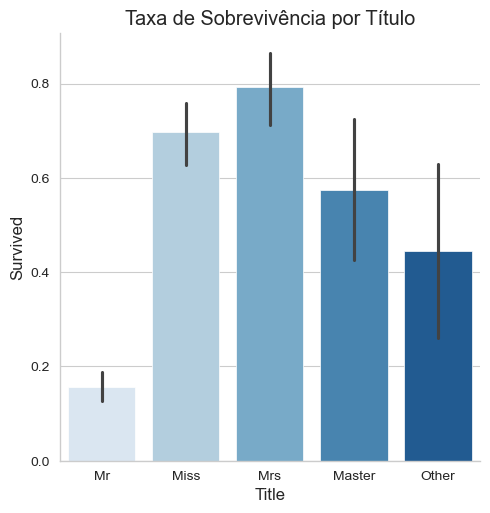

In [63]:
# Certifique-se de que train_proc e test_proc estão definidos
if 'train_proc' not in globals() or 'test_proc' not in globals():
    print("ERRO: DataFrames 'train_proc' ou 'test_proc' não definidos. Execute as células anteriores.")
else:
    print("Extraindo Títulos da coluna 'Name'...")

    # Extrair o título usando expressão regular
    # A expressão regular ' ([A-Za-z]+)\.' procura por uma palavra (letras)
    # que esteja entre um espaço e um ponto.
    if 'Name' in train_proc.columns:
        train_proc['Title'] = train_proc['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
        print("'Title' extraído para train_proc.")
    else:
        print("Atenção: Coluna 'Name' não encontrada em train_proc.")

    if 'Name' in test_proc.columns:
        test_proc['Title'] = test_proc['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
        print("'Title' extraído para test_proc.")
    else:
        print("Atenção: Coluna 'Name' não encontrada em test_proc.")

    # Verificar os títulos únicos encontrados em ambos os DataFrames
    if 'Title' in train_proc.columns and 'Title' in test_proc.columns:
        print("\nTítulos únicos em train_proc:")
        display(train_proc['Title'].value_counts())
        print("\nTítulos únicos em test_proc:")
        display(test_proc['Title'].value_counts())

        # Agrupar títulos raros para simplificar
        # Vamos definir os títulos mais comuns e agrupar os outros em 'Other'
        common_titles = ['Mr', 'Miss', 'Mrs', 'Master']
        
        train_proc['Title'] = train_proc['Title'].apply(lambda x: x if x in common_titles else 'Other')
        test_proc['Title'] = test_proc['Title'].apply(lambda x: x if x in common_titles else 'Other')
        
        # Alguns títulos podem ser mapeados para categorias mais amplas
        # Ex: Mlle e Ms para Miss, Mme para Mrs.
        # No nosso caso, 'Other' já agrupa os menos comuns. Poderíamos refinar mais, mas vamos manter assim por ora.
        # Exemplo de mapeamento mais detalhado (opcional, se não usar 'Other' de forma tão ampla):
        # title_mapping = {
        #     "Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs", "Master": "Master",
        #     "Dr": "Other", "Rev": "Other", "Col": "Other", "Major": "Other", "Capt": "Other",
        #     "Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs", "Lady": "Other", "Countess": "Other",
        #     "Jonkheer": "Other", "Sir": "Other", "Don": "Other", "Dona": "Other" # Dona é para test_df
        # }
        # train_proc['Title'] = train_proc['Title'].map(title_mapping).fillna('Other')
        # test_proc['Title'] = test_proc['Title'].map(title_mapping).fillna('Other')

        print("\nTítulos após agrupamento em train_proc:")
        display(train_proc['Title'].value_counts())
        print("\nTítulos após agrupamento em test_proc:")
        display(test_proc['Title'].value_counts())

        # Análise de Título vs. Sobrevivência (no train_proc)
        if 'Survived' in train_proc.columns:
            print("\n--- Análise: Title vs. Survived ---")
            display(pd.crosstab(train_proc['Title'], train_proc['Survived'], normalize='index') * 100)
            sns.catplot(x='Title', y='Survived', data=train_proc, kind='bar', palette="Blues", order=['Mr', 'Miss', 'Mrs', 'Master', 'Other'])
            plt.title('Taxa de Sobrevivência por Título')
            plt.show()
    else:
        print("Não foi possível processar ou analisar 'Title', pois a coluna não foi criada em ambos os DataFrames.")

In [64]:
# Certifique-se de que train_proc e test_proc estão definidos
if 'train_proc' not in globals() or 'test_proc' not in globals():
    print("ERRO: DataFrames 'train_proc' ou 'test_proc' não definidos. Execute as células anteriores.")
else:
    # Colunas a serem removidas
    cols_to_drop = ['Name', 'Ticket', 'SibSp', 'Parch']
    
    # Remover PassengerId do train_proc apenas, pois já guardamos o do test_proc
    # e ele não está no test_proc após o processamento inicial (se seguiu o fluxo)
    # ou não será usado como feature.
    if 'PassengerId' in train_proc.columns:
        train_proc = train_proc.drop('PassengerId', axis=1)
        print("Coluna 'PassengerId' removida de train_proc.")
    else:
        print("Coluna 'PassengerId' não encontrada em train_proc (provavelmente já removida).")

    # O PassengerId do test_proc já foi guardado em passenger_id_test.
    # A coluna 'PassengerId' no test_proc em si não será usada para treinar o modelo,
    # então podemos removê-la de test_proc também se ainda existir.
    if 'PassengerId' in test_proc.columns:
        test_proc = test_proc.drop('PassengerId', axis=1)
        print("Coluna 'PassengerId' removida de test_proc.")
    else:
        print("Coluna 'PassengerId' não encontrada em test_proc (provavelmente já removida).")


    print(f"\nRemovendo colunas: {', '.join(cols_to_drop)} de train_proc e test_proc...")
    
    for col in cols_to_drop:
        if col in train_proc.columns:
            train_proc = train_proc.drop(col, axis=1)
            print(f"Coluna '{col}' removida de train_proc.")
        else:
            print(f"Coluna '{col}' não encontrada em train_proc (provavelmente já removida).")
            
        if col in test_proc.columns:
            test_proc = test_proc.drop(col, axis=1)
            print(f"Coluna '{col}' removida de test_proc.")
        else:
            print(f"Coluna '{col}' não encontrada em test_proc (provavelmente já removida).")

    print("\nColunas restantes em train_proc:")
    display(train_proc.head(2))
    print(f"Dimensões de train_proc: {train_proc.shape}")

    print("\nColunas restantes em test_proc:")
    display(test_proc.head(2))
    print(f"Dimensões de test_proc: {test_proc.shape}")

Coluna 'PassengerId' removida de train_proc.
Coluna 'PassengerId' removida de test_proc.

Removendo colunas: Name, Ticket, SibSp, Parch de train_proc e test_proc...
Coluna 'Name' removida de train_proc.
Coluna 'Name' removida de test_proc.
Coluna 'Ticket' não encontrada em train_proc (provavelmente já removida).
Coluna 'Ticket' não encontrada em test_proc (provavelmente já removida).
Coluna 'SibSp' removida de train_proc.
Coluna 'SibSp' removida de test_proc.
Coluna 'Parch' removida de train_proc.
Coluna 'Parch' removida de test_proc.

Colunas restantes em train_proc:


,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone,Title
0,0,3,male,22.0,7.2500,S,2,0,Mr
1,1,1,female,38.0,71.2833,C,2,0,Mrs


Dimensões de train_proc: (891, 9)

Colunas restantes em test_proc:


,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone,Title
0,3,male,34.5,7.8292,Q,1,1,Mr
1,3,female,47.0,7.0000,S,2,0,Mrs


Dimensões de test_proc: (418, 8)


In [65]:
# Certifique-se de que train_proc e test_proc estão definidos
if 'train_proc' not in globals() or 'test_proc' not in globals():
    print("ERRO: DataFrames 'train_proc' ou 'test_proc' não definidos. Execute as células anteriores.")
else:
    categorical_cols_to_encode = ['Sex', 'Embarked', 'Title']
    
    print("Colunas categóricas a serem codificadas (One-Hot Encoding):", categorical_cols_to_encode)

    # Verificar se as colunas existem antes de tentar codificar
    missing_cols_train = [col for col in categorical_cols_to_encode if col not in train_proc.columns]
    missing_cols_test = [col for col in categorical_cols_to_encode if col not in test_proc.columns]

    if missing_cols_train:
        print(f"Atenção: Colunas {missing_cols_train} não encontradas em train_proc. Não serão codificadas.")
    if missing_cols_test:
        print(f"Atenção: Colunas {missing_cols_test} não encontradas em test_proc. Não serão codificadas.")

    # Filtrar para apenas colunas existentes
    actual_categorical_cols_train = [col for col in categorical_cols_to_encode if col in train_proc.columns]
    actual_categorical_cols_test = [col for col in categorical_cols_to_encode if col in test_proc.columns]

    if not actual_categorical_cols_train:
        print("Nenhuma coluna categórica encontrada em train_proc para codificar.")
    else:
        train_proc = pd.get_dummies(train_proc, columns=actual_categorical_cols_train, drop_first=True)
        print("\nOne-Hot Encoding aplicado a train_proc.")
        display(train_proc.head())
        print(f"Novas dimensões de train_proc: {train_proc.shape}")

    if not actual_categorical_cols_test:
        print("Nenhuma coluna categórica encontrada em test_proc para codificar.")
    else:
        test_proc = pd.get_dummies(test_proc, columns=actual_categorical_cols_test, drop_first=True)
        print("\nOne-Hot Encoding aplicado a test_proc.")
        display(test_proc.head())
        print(f"Novas dimensões de test_proc: {test_proc.shape}")

    # --- Alinhamento de Colunas ---
    # Após o get_dummies, train_proc e test_proc podem ter um conjunto diferente de colunas
    # se alguma categoria estava presente em um mas não no outro (ex: um Title específico).
    # Precisamos garantir que ambos tenham exatamente as mesmas colunas de features.

    print("\nAlinhando colunas entre train_proc e test_proc...")
    
    # Separar 'Survived' do train_proc antes de alinhar, se ele ainda não foi separado
    # No nosso fluxo, 'Survived' ainda está em train_proc.
    if 'Survived' in train_proc.columns:
        train_labels = train_proc['Survived'] # Guardar os labels
        train_features = train_proc.drop('Survived', axis=1)
    else:
        # Se 'Survived' já foi separado ou não existe, assumimos que train_proc é só features
        print("Atenção: 'Survived' não encontrado em train_proc. Assumindo que já é um DataFrame de features.")
        train_features = train_proc.copy() 
        train_labels = None # Indicar que os labels não foram extraídos aqui

    # test_proc já não tem 'Survived', então é só features
    test_features = test_proc.copy()

    # Obter colunas comuns e reindexar
    # Isso garante que ambos os dataframes tenham as mesmas colunas na mesma ordem,
    # preenchendo com 0 as colunas que faltam em um ou outro.
    common_cols = list(set(train_features.columns) & set(test_features.columns))
    
    # É mais seguro e robusto identificar todas as colunas dummy geradas no treino
    # e garantir que o teste tenha as mesmas (adicionando as que faltam com valor 0)
    # e removendo do teste as que não estão no treino.

    # Colunas no treino após dummies
    train_cols = set(train_features.columns)
    # Colunas no teste após dummies
    test_cols = set(test_features.columns)

    # Colunas que estão no treino mas não no teste (adicionar ao teste com valor 0)
    for col in train_cols - test_cols:
        test_features[col] = 0
        print(f"Coluna '{col}' adicionada a test_features com valor 0.")

    # Colunas que estão no teste mas não no treino (remover do teste)
    # Isso é menos comum se 'drop_first=True' foi usado consistentemente e os valores
    # das features originais são os mesmos, mas pode acontecer com títulos raros
    # como 'Dona' que só apareceu no teste e foi categorizado como 'Other'.
    # Se 'Other' já existe no treino, tudo bem. Se uma nova dummy foi criada SÓ no teste, precisa sair.
    cols_to_remove_from_test = list(test_cols - train_cols)
    if cols_to_remove_from_test:
        test_features = test_features.drop(columns=cols_to_remove_from_test)
        print(f"Colunas {cols_to_remove_from_test} removidas de test_features por não estarem no treino.")

    # Garantir a mesma ordem de colunas
    test_features = test_features[train_features.columns]

    print("\nDimensões após alinhamento:")
    print(f"train_features: {train_features.shape}")
    print(f"test_features: {test_features.shape}")

    print("\nPrimeiras linhas de train_features (após one-hot e alinhamento):")
    display(train_features.head())
    print("\nPrimeiras linhas de test_features (após one-hot e alinhamento):")
    display(test_features.head())
    
    # Verificar se há NaNs restantes (não deveria haver neste ponto)
    print("\nNaNs restantes em train_features:", train_features.isnull().sum().sum())
    print("NaNs restantes em test_features:", test_features.isnull().sum().sum())

Colunas categóricas a serem codificadas (One-Hot Encoding): ['Sex', 'Embarked', 'Title']

One-Hot Encoding aplicado a train_proc.


,Survived,Pclass,Age,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,3,22.0,7.2500,2,0,True,False,True,False,True,False,False
1,1,1,38.0,71.2833,2,0,False,False,False,False,False,True,False
2,1,3,26.0,7.9250,1,1,False,False,True,True,False,False,False
3,1,1,35.0,53.1000,2,0,False,False,True,False,False,True,False
4,0,3,35.0,8.0500,1,1,True,False,True,False,True,False,False


Novas dimensões de train_proc: (891, 13)

One-Hot Encoding aplicado a test_proc.


,Pclass,Age,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,3,34.5,7.8292,1,1,True,True,False,False,True,False,False
1,3,47.0,7.0000,2,0,False,False,True,False,False,True,False
2,2,62.0,9.6875,1,1,True,True,False,False,True,False,False
3,3,27.0,8.6625,1,1,True,False,True,False,True,False,False
4,3,22.0,12.2875,3,0,False,False,True,False,False,True,False


Novas dimensões de test_proc: (418, 12)

Alinhando colunas entre train_proc e test_proc...

Dimensões após alinhamento:
train_features: (891, 12)
test_features: (418, 12)

Primeiras linhas de train_features (após one-hot e alinhamento):


,Pclass,Age,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,3,22.0,7.2500,2,0,True,False,True,False,True,False,False
1,1,38.0,71.2833,2,0,False,False,False,False,False,True,False
2,3,26.0,7.9250,1,1,False,False,True,True,False,False,False
3,1,35.0,53.1000,2,0,False,False,True,False,False,True,False
4,3,35.0,8.0500,1,1,True,False,True,False,True,False,False



Primeiras linhas de test_features (após one-hot e alinhamento):


,Pclass,Age,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,3,34.5,7.8292,1,1,True,True,False,False,True,False,False
1,3,47.0,7.0000,2,0,False,False,True,False,False,True,False
2,2,62.0,9.6875,1,1,True,True,False,False,True,False,False
3,3,27.0,8.6625,1,1,True,False,True,False,True,False,False
4,3,22.0,12.2875,3,0,False,False,True,False,False,True,False



NaNs restantes em train_features: 0
NaNs restantes em test_features: 0


In [66]:
from sklearn.preprocessing import StandardScaler

# Certifique-se de que train_features e test_features estão definidos
if 'train_features' not in globals() or 'test_features' not in globals():
    print("ERRO: DataFrames 'train_features' ou 'test_features' não definidos. Execute a célula anterior.")
else:
    print("Aplicando StandardScaler...")

    # Inicializar o scaler
    scaler = StandardScaler()

    # Identificar colunas que realmente precisam de escalonamento
    # Pclass, IsAlone, e as dummies já são 0/1 ou pequeno range. Age e Fare são os principais candidatos.
    # FamilySize também pode se beneficiar.
    # Vamos aplicar a todas por simplicidade, mas em alguns casos pode-se ser seletivo.
    # Se você tivesse colunas que são intrinsecamente binárias (0/1) e não quer escaloná-las,
    # você poderia selecioná-las aqui.
    
    cols_to_scale = train_features.columns 
    # Alternativamente, para ser mais específico:
    # cols_to_scale = ['Age', 'Fare', 'FamilySize'] # Exemplo
    # cols_not_to_scale = [col for col in train_features.columns if col not in cols_to_scale]

    # Ajustar o scaler APENAS nos dados de treino e transformar os dados de treino
    # Convertendo para DataFrame para manter nomes das colunas e índices
    train_features_scaled_values = scaler.fit_transform(train_features[cols_to_scale])
    train_features_scaled = pd.DataFrame(train_features_scaled_values, columns=cols_to_scale, index=train_features.index)
    
    # Se você escalou apenas um subconjunto de colunas:
    # train_features_scaled = pd.concat([train_features_scaled, train_features[cols_not_to_scale]], axis=1)


    # Transformar os dados de teste usando o scaler AJUSTADO NOS DADOS DE TREINO
    test_features_scaled_values = scaler.transform(test_features[cols_to_scale])
    test_features_scaled = pd.DataFrame(test_features_scaled_values, columns=cols_to_scale, index=test_features.index)

    # Se você escalou apenas um subconjunto de colunas:
    # test_features_scaled = pd.concat([test_features_scaled, test_features[cols_not_to_scale]], axis=1)
    
    # Garantir a mesma ordem de colunas (deve ser mantida se todas foram escaladas)
    test_features_scaled = test_features_scaled[train_features_scaled.columns]


    print("\nPrimeiras linhas de train_features_scaled:")
    display(train_features_scaled.head())
    print(f"Dimensões de train_features_scaled: {train_features_scaled.shape}")

    print("\nPrimeiras linhas de test_features_scaled:")
    display(test_features_scaled.head())
    print(f"Dimensões de test_features_scaled: {test_features_scaled.shape}")

    # Para os próximos passos, vamos usar essas versões escalonadas.
    # Se você quiser comparar modelos com e sem escalonamento, pode manter as originais também.
    X_final = train_features_scaled
    X_test_final = test_features_scaled
    y_final = train_labels # train_labels já foi definido na célula anterior

    if y_final is None and 'train_labels' in globals():
        y_final = train_labels
        print("y_final definido usando train_labels global.")
    elif y_final is None:
        print("ERRO CRÍTICO: train_labels (y_final) não está definido. Verifique a célula de one-hot encoding.")

Aplicando StandardScaler...

Primeiras linhas de train_features_scaled:


,Pclass,Age,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0.827377,-0.565736,-0.502445,0.059160,-1.231645,0.737695,-0.307562,0.615838,-0.506655,0.850532,-0.403962,-0.176777
1,-1.566107,0.663861,0.786845,0.059160,-1.231645,-1.355574,-0.307562,-1.623803,-0.506655,-1.175735,2.475480,-0.176777
2,0.827377,-0.258337,-0.488854,-0.560975,0.811922,-1.355574,-0.307562,0.615838,1.973729,-1.175735,-0.403962,-0.176777
3,-1.566107,0.433312,0.420730,0.059160,-1.231645,-1.355574,-0.307562,0.615838,-0.506655,-1.175735,2.475480,-0.176777
4,0.827377,0.433312,-0.486337,-0.560975,0.811922,0.737695,-0.307562,0.615838,-0.506655,0.850532,-0.403962,-0.176777


Dimensões de train_features_scaled: (891, 12)

Primeiras linhas de test_features_scaled:


,Pclass,Age,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0.827377,0.394887,-0.490783,-0.560975,0.811922,0.737695,3.251373,-1.623803,-0.506655,0.850532,-0.403962,-0.176777
1,0.827377,1.355510,-0.507479,0.059160,-1.231645,-1.355574,-0.307562,0.615838,-0.506655,-1.175735,2.475480,-0.176777
2,-0.369365,2.508257,-0.453367,-0.560975,0.811922,0.737695,3.251373,-1.623803,-0.506655,0.850532,-0.403962,-0.176777
3,0.827377,-0.181487,-0.474005,-0.560975,0.811922,0.737695,-0.307562,0.615838,-0.506655,0.850532,-0.403962,-0.176777
4,0.827377,-0.565736,-0.401017,0.679295,-1.231645,-1.355574,-0.307562,0.615838,-0.506655,-1.175735,2.475480,-0.176777


Dimensões de test_features_scaled: (418, 12)


In [67]:
from sklearn.model_selection import train_test_split

# Certifique-se de que X_final e y_final estão definidos
if 'X_final' not in globals() or 'y_final' not in globals() or y_final is None:
    print("ERRO: 'X_final' ou 'y_final' não estão definidos corretamente. Verifique as células anteriores.")
    # Pare aqui ou adicione lógica para lidar com isso. Para este fluxo, assumimos que estão definidos.
    # Se y_final é None, significa que train_labels não foi capturado corretamente.
    if y_final is None and 'train_labels' in globals() and train_labels is not None:
        y_final = train_labels # Tenta recuperar train_labels se foi perdido
        print("Recuperado y_final a partir de train_labels global.")
    elif y_final is None:
         raise ValueError("y_final (train_labels) não está definido. Interrompendo.")


# Dividir os dados de treino em conjuntos de treino e validação
# test_size=0.2 significa que 20% dos dados serão usados para validação, e 80% para treino.
# random_state garante que a divisão seja a mesma toda vez que o código rodar (reprodutibilidade).
# stratify=y_final é importante para problemas de classificação, pois garante que a proporção
# das classes na variável alvo (y_final) seja aproximadamente a mesma nos conjuntos de treino e validação.
try:
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
        X_final, 
        y_final, 
        test_size=0.2, 
        random_state=42, 
        stratify=y_final
    )

    print("Dados divididos em conjuntos de treino e validação (split):")
    print(f"X_train_split (treino para modelos locais): {X_train_split.shape}")
    print(f"y_train_split (rótulos para treino local): {y_train_split.shape}")
    print(f"X_val_split (validação para modelos locais): {X_val_split.shape}")
    print(f"y_val_split (rótulos para validação local): {y_val_split.shape}")

    print("\nDistribuição da variável alvo no y_train_split:")
    print(y_train_split.value_counts(normalize=True))
    print("\nDistribuição da variável alvo no y_val_split:")
    print(y_val_split.value_counts(normalize=True))
    print("\nDistribuição da variável alvo no y_final original:")
    print(y_final.value_counts(normalize=True))

except ValueError as e:
    print(f"Erro ao dividir os dados: {e}")
    print("Verifique se y_final (train_labels) foi corretamente definido e não é None.")
    print(f"Tipo de y_final: {type(y_final)}")
    if y_final is not None:
        print(f"Shape de y_final: {y_final.shape}")
        print(f"Valores ausentes em y_final: {y_final.isnull().sum()}")

Dados divididos em conjuntos de treino e validação (split):
X_train_split (treino para modelos locais): (712, 12)
y_train_split (rótulos para treino local): (712,)
X_val_split (validação para modelos locais): (179, 12)
y_val_split (rótulos para validação local): (179,)

Distribuição da variável alvo no y_train_split:
Survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64

Distribuição da variável alvo no y_val_split:
Survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64

Distribuição da variável alvo no y_final original:
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


--- Treinando e Avaliando: Regressão Logística ---
Treinando o modelo de Regressão Logística...
Modelo treinado.

--- Resultados da Avaliação (Regressão Logística no conjunto de validação) ---
Acurácia: 0.8436
AUC-ROC: 0.8793

Matriz de Confusão:


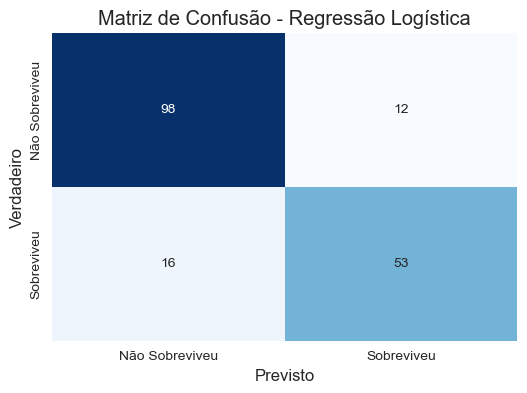


Relatório de Classificação:
                    precision    recall  f1-score   support

Não Sobreviveu (0)       0.86      0.89      0.88       110
    Sobreviveu (1)       0.82      0.77      0.79        69

          accuracy                           0.84       179
         macro avg       0.84      0.83      0.83       179
      weighted avg       0.84      0.84      0.84       179



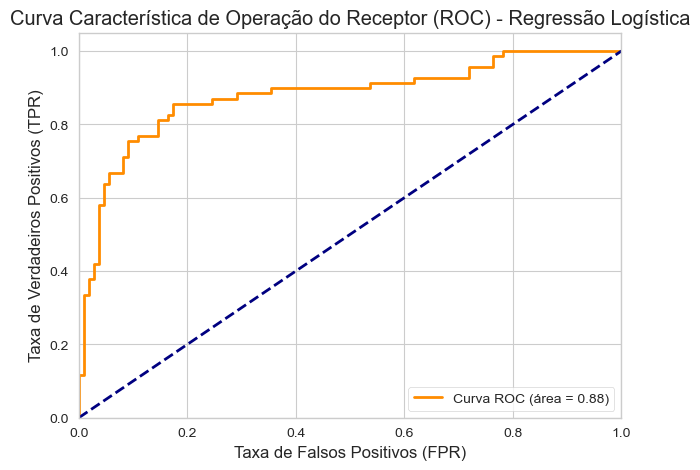

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Certifique-se de que os dados de treino/validação splitados estão definidos
if 'X_train_split' not in globals() or \
   'y_train_split' not in globals() or \
   'X_val_split' not in globals() or \
   'y_val_split' not in globals():
    print("ERRO: Dados de treino/validação (X_train_split, etc.) não definidos. Execute a célula anterior.")
    # Adicione lógica para parar ou lidar com isso.
else:
    print("--- Treinando e Avaliando: Regressão Logística ---")

    # 1. Criar uma instância do modelo
    # max_iter aumentado para garantir convergência, solver='liblinear' é bom para datasets pequenos.
    log_reg_model = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)

    # 2. Treinar o modelo
    print("Treinando o modelo de Regressão Logística...")
    log_reg_model.fit(X_train_split, y_train_split)
    print("Modelo treinado.")

    # 3. Fazer previsões no conjunto de validação
    y_pred_log_reg = log_reg_model.predict(X_val_split)
    y_pred_proba_log_reg = log_reg_model.predict_proba(X_val_split)[:, 1] # Probabilidades para a classe positiva (1)

    # 4. Avaliar o desempenho
    print("\n--- Resultados da Avaliação (Regressão Logística no conjunto de validação) ---")
    
    # Acurácia
    accuracy_lr = accuracy_score(y_val_split, y_pred_log_reg)
    print(f"Acurácia: {accuracy_lr:.4f}")

    # AUC-ROC Score
    # É uma boa métrica para classificação binária, especialmente com classes desbalanceadas.
    auc_roc_lr = roc_auc_score(y_val_split, y_pred_proba_log_reg)
    print(f"AUC-ROC: {auc_roc_lr:.4f}")

    # Matriz de Confusão
    print("\nMatriz de Confusão:")
    cm_lr = confusion_matrix(y_val_split, y_pred_log_reg)
    # Plotar a matriz de confusão de forma mais visual
    plt.figure(figsize=(6,4))
    sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Não Sobreviveu', 'Sobreviveu'], 
                yticklabels=['Não Sobreviveu', 'Sobreviveu'])
    plt.xlabel('Previsto')
    plt.ylabel('Verdadeiro')
    plt.title('Matriz de Confusão - Regressão Logística')
    plt.show()
    
    # Relatório de Classificação
    print("\nRelatório de Classificação:")
    print(classification_report(y_val_split, y_pred_log_reg, target_names=['Não Sobreviveu (0)', 'Sobreviveu (1)']))

    # Curva ROC
    fpr, tpr, thresholds = roc_curve(y_val_split, y_pred_proba_log_reg)
    plt.figure(figsize=(7,5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (área = {auc_roc_lr:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Linha de referência (classificador aleatório)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos (FPR)')
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
    plt.title('Curva Característica de Operação do Receptor (ROC) - Regressão Logística')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()



--- Treinando e Avaliando: Random Forest Classifier ---
Treinando o modelo Random Forest...
Modelo treinado.

--- Resultados da Avaliação (Random Forest no conjunto de validação) ---
Acurácia: 0.8101
AUC-ROC: 0.8472

Matriz de Confusão:


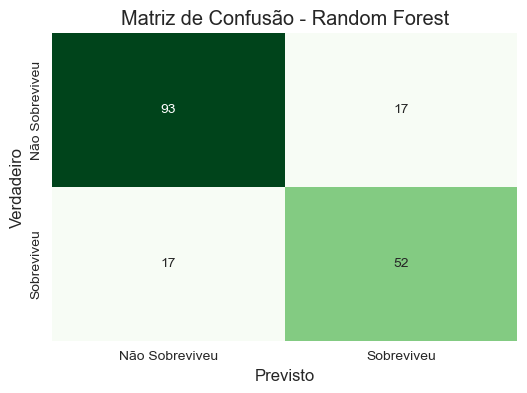


Relatório de Classificação:
                    precision    recall  f1-score   support

Não Sobreviveu (0)       0.85      0.85      0.85       110
    Sobreviveu (1)       0.75      0.75      0.75        69

          accuracy                           0.81       179
         macro avg       0.80      0.80      0.80       179
      weighted avg       0.81      0.81      0.81       179



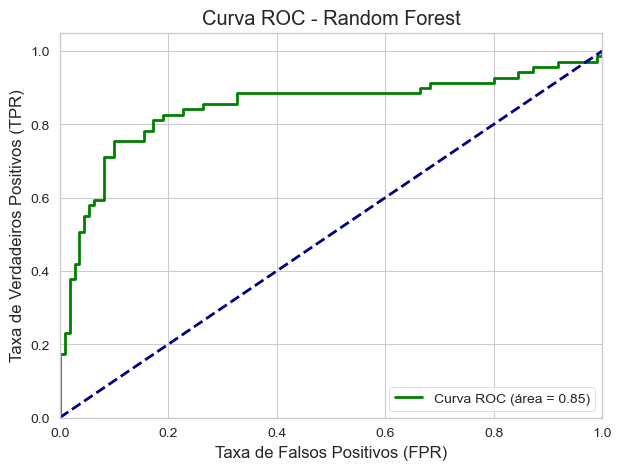

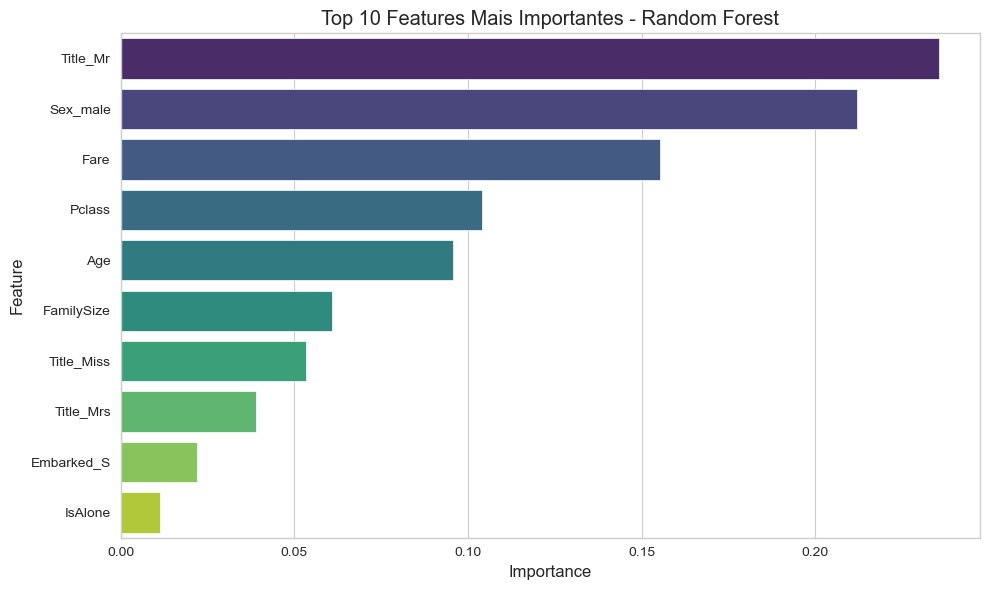


Importância das Features (Random Forest):


,Feature,Importance
9,Title_Mr,0.235618
5,Sex_male,0.211960
2,Fare,0.155157
0,Pclass,0.104121
1,Age,0.095803
3,FamilySize,0.060957
8,Title_Miss,0.053268
10,Title_Mrs,0.038898
7,Embarked_S,0.022144
4,IsAlone,0.011358


In [69]:
from sklearn.ensemble import RandomForestClassifier

# Certifique-se de que os dados de treino/validação splitados estão definidos
if 'X_train_split' not in globals() or \
   'y_train_split' not in globals() or \
   'X_val_split' not in globals() or \
   'y_val_split' not in globals():
    print("ERRO: Dados de treino/validação (X_train_split, etc.) não definidos. Execute a célula anterior.")
else:
    print("\n\n--- Treinando e Avaliando: Random Forest Classifier ---")

    # 1. Criar uma instância do modelo
    # n_estimators: número de árvores na floresta.
    # max_depth: profundidade máxima de cada árvore.
    # min_samples_split: número mínimo de amostras para dividir um nó interno.
    # min_samples_leaf: número mínimo de amostras em um nó folha.
    # random_state para reprodutibilidade.
    rf_model = RandomForestClassifier(
        n_estimators=100,     # Um bom ponto de partida
        max_depth=7,          # Evita overfitting, pode ser ajustado
        min_samples_leaf=5,   # Evita overfitting, pode ser ajustado
        random_state=42,
        class_weight='balanced' # Ajuda com classes desbalanceadas, se for o caso
    )

    # 2. Treinar o modelo
    print("Treinando o modelo Random Forest...")
    rf_model.fit(X_train_split, y_train_split)
    print("Modelo treinado.")

    # 3. Fazer previsões no conjunto de validação
    y_pred_rf = rf_model.predict(X_val_split)
    y_pred_proba_rf = rf_model.predict_proba(X_val_split)[:, 1] # Probabilidades para a classe positiva (1)

    # 4. Avaliar o desempenho
    print("\n--- Resultados da Avaliação (Random Forest no conjunto de validação) ---")
    
    # Acurácia
    accuracy_rf = accuracy_score(y_val_split, y_pred_rf)
    print(f"Acurácia: {accuracy_rf:.4f}")

    # AUC-ROC Score
    auc_roc_rf = roc_auc_score(y_val_split, y_pred_proba_rf)
    print(f"AUC-ROC: {auc_roc_rf:.4f}")

    # Matriz de Confusão
    print("\nMatriz de Confusão:")
    cm_rf = confusion_matrix(y_val_split, y_pred_rf)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False,
                xticklabels=['Não Sobreviveu', 'Sobreviveu'], 
                yticklabels=['Não Sobreviveu', 'Sobreviveu'])
    plt.xlabel('Previsto')
    plt.ylabel('Verdadeiro')
    plt.title('Matriz de Confusão - Random Forest')
    plt.show()
    
    # Relatório de Classificação
    print("\nRelatório de Classificação:")
    print(classification_report(y_val_split, y_pred_rf, target_names=['Não Sobreviveu (0)', 'Sobreviveu (1)']))

    # Curva ROC
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_val_split, y_pred_proba_rf)
    plt.figure(figsize=(7,5))
    plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Curva ROC (área = {auc_roc_rf:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos (FPR)')
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
    plt.title('Curva ROC - Random Forest')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    # Importância das Features (Feature Importance)
    # Random Forest pode nos dar uma estimativa da importância de cada feature.
    if hasattr(rf_model, 'feature_importances_'):
        importances = rf_model.feature_importances_
        feature_names = X_train_split.columns # Nomes das features
        
        # Criar um DataFrame para melhor visualização
        feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis') # Top 10 features
        plt.title('Top 10 Features Mais Importantes - Random Forest')
        plt.tight_layout()
        plt.show()
        
        print("\nImportância das Features (Random Forest):")
        display(feature_importance_df)



--- Treinando e Avaliando: K-Nearest Neighbors (KNN) ---
Treinando o modelo KNN...
Modelo treinado.

--- Resultados da Avaliação (KNN no conjunto de validação) ---
Acurácia: 0.8045
AUC-ROC: 0.8600

Matriz de Confusão:


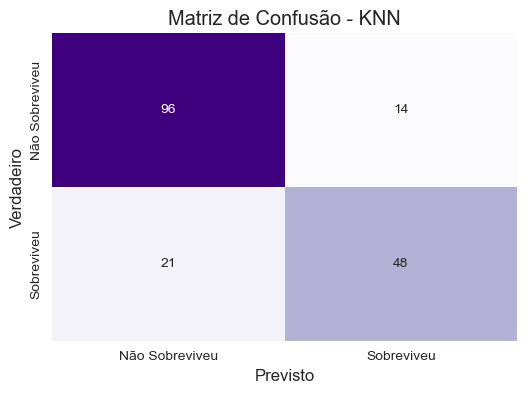


Relatório de Classificação:
                    precision    recall  f1-score   support

Não Sobreviveu (0)       0.82      0.87      0.85       110
    Sobreviveu (1)       0.77      0.70      0.73        69

          accuracy                           0.80       179
         macro avg       0.80      0.78      0.79       179
      weighted avg       0.80      0.80      0.80       179



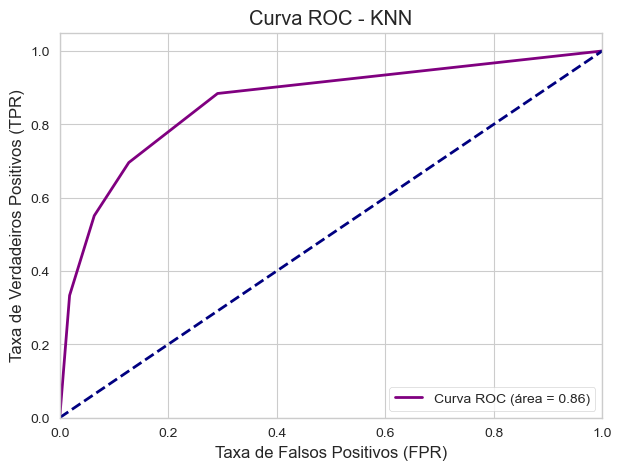

In [70]:
from sklearn.neighbors import KNeighborsClassifier

# Certifique-se de que os dados de treino/validação splitados estão definidos
if 'X_train_split' not in globals() or \
   'y_train_split' not in globals() or \
   'X_val_split' not in globals() or \
   'y_val_split' not in globals():
    print("ERRO: Dados de treino/validação (X_train_split, etc.) não definidos. Execute a célula 18.")
else:
    print("\n\n--- Treinando e Avaliando: K-Nearest Neighbors (KNN) ---")

    # 1. Criar uma instância do modelo
    # n_neighbors é o 'K'. Um valor comum para começar é 5.
    # KNN é sensível à escala das features, o que já fizemos com StandardScaler.
    knn_model = KNeighborsClassifier(n_neighbors=5) # Você pode experimentar diferentes valores de k

    # 2. Treinar o modelo
    print("Treinando o modelo KNN...")
    knn_model.fit(X_train_split, y_train_split)
    print("Modelo treinado.")

    # 3. Fazer previsões no conjunto de validação
    y_pred_knn = knn_model.predict(X_val_split)
    y_pred_proba_knn = knn_model.predict_proba(X_val_split)[:, 1]

    # 4. Avaliar o desempenho
    print("\n--- Resultados da Avaliação (KNN no conjunto de validação) ---")
    
    accuracy_knn = accuracy_score(y_val_split, y_pred_knn)
    print(f"Acurácia: {accuracy_knn:.4f}")

    auc_roc_knn = roc_auc_score(y_val_split, y_pred_proba_knn)
    print(f"AUC-ROC: {auc_roc_knn:.4f}")

    print("\nMatriz de Confusão:")
    cm_knn = confusion_matrix(y_val_split, y_pred_knn)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Purples', cbar=False,
                xticklabels=['Não Sobreviveu', 'Sobreviveu'], 
                yticklabels=['Não Sobreviveu', 'Sobreviveu'])
    plt.xlabel('Previsto')
    plt.ylabel('Verdadeiro')
    plt.title('Matriz de Confusão - KNN')
    plt.show()
    
    print("\nRelatório de Classificação:")
    print(classification_report(y_val_split, y_pred_knn, target_names=['Não Sobreviveu (0)', 'Sobreviveu (1)']))
    
    fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_val_split, y_pred_proba_knn)
    plt.figure(figsize=(7,5))
    plt.plot(fpr_knn, tpr_knn, color='purple', lw=2, label=f'Curva ROC (área = {auc_roc_knn:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos (FPR)')
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
    plt.title('Curva ROC - KNN')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()



--- Treinando e Avaliando: Gaussian Naive Bayes ---
Treinando o modelo Gaussian Naive Bayes...
Modelo treinado.

--- Resultados da Avaliação (Gaussian Naive Bayes no conjunto de validação) ---
Acurácia: 0.7598
AUC-ROC: 0.8174

Matriz de Confusão:


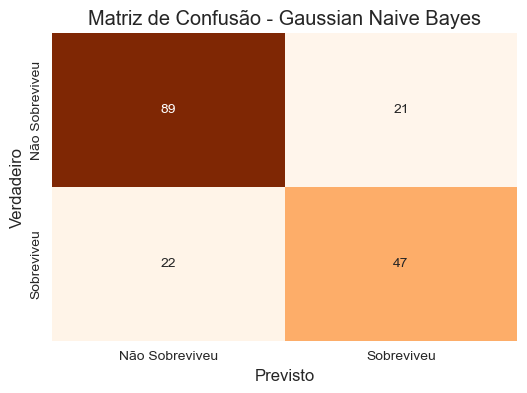


Relatório de Classificação:
                    precision    recall  f1-score   support

Não Sobreviveu (0)       0.80      0.81      0.81       110
    Sobreviveu (1)       0.69      0.68      0.69        69

          accuracy                           0.76       179
         macro avg       0.75      0.75      0.75       179
      weighted avg       0.76      0.76      0.76       179



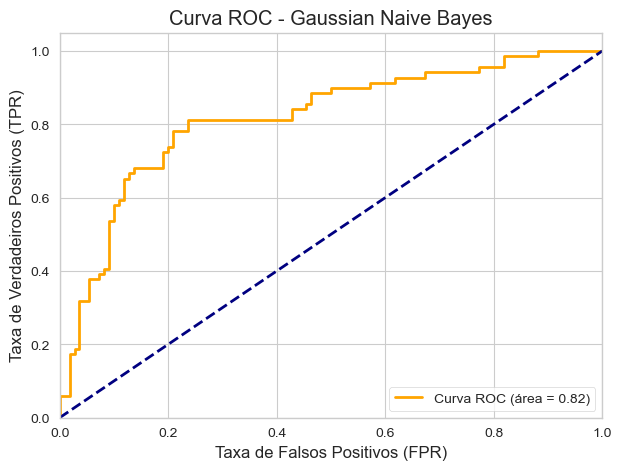

In [71]:
from sklearn.naive_bayes import GaussianNB

# Certifique-se de que os dados de treino/validação splitados estão definidos
if 'X_train_split' not in globals() or \
   'y_train_split' not in globals() or \
   'X_val_split' not in globals() or \
   'y_val_split' not in globals():
    print("ERRO: Dados de treino/validação (X_train_split, etc.) não definidos. Execute a célula 18.")
else:
    print("\n\n--- Treinando e Avaliando: Gaussian Naive Bayes ---")

    # 1. Criar uma instância do modelo
    # GaussianNB não tem muitos hiperparâmetros para ajustar.
    gnb_model = GaussianNB()

    # 2. Treinar o modelo
    print("Treinando o modelo Gaussian Naive Bayes...")
    gnb_model.fit(X_train_split, y_train_split)
    print("Modelo treinado.")

    # 3. Fazer previsões no conjunto de validação
    y_pred_gnb = gnb_model.predict(X_val_split)
    y_pred_proba_gnb = gnb_model.predict_proba(X_val_split)[:, 1]

    # 4. Avaliar o desempenho
    print("\n--- Resultados da Avaliação (Gaussian Naive Bayes no conjunto de validação) ---")
    
    accuracy_gnb = accuracy_score(y_val_split, y_pred_gnb)
    print(f"Acurácia: {accuracy_gnb:.4f}")

    auc_roc_gnb = roc_auc_score(y_val_split, y_pred_proba_gnb)
    print(f"AUC-ROC: {auc_roc_gnb:.4f}")

    print("\nMatriz de Confusão:")
    cm_gnb = confusion_matrix(y_val_split, y_pred_gnb)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Oranges', cbar=False,
                xticklabels=['Não Sobreviveu', 'Sobreviveu'], 
                yticklabels=['Não Sobreviveu', 'Sobreviveu'])
    plt.xlabel('Previsto')
    plt.ylabel('Verdadeiro')
    plt.title('Matriz de Confusão - Gaussian Naive Bayes')
    plt.show()
    
    print("\nRelatório de Classificação:")
    print(classification_report(y_val_split, y_pred_gnb, target_names=['Não Sobreviveu (0)', 'Sobreviveu (1)']))
    
    fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_val_split, y_pred_proba_gnb)
    plt.figure(figsize=(7,5))
    plt.plot(fpr_gnb, tpr_gnb, color='orange', lw=2, label=f'Curva ROC (área = {auc_roc_gnb:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos (FPR)')
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
    plt.title('Curva ROC - Gaussian Naive Bayes')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()



--- Avaliando Modelos com Validação Cruzada (K-Fold) ---

Métricas de Validação Cruzada (5 folds):
----------------------------------------------------
Regressão Logística:
  Acurácia Média: 0.8283 (+/- 0.0227)
  AUC-ROC Médio: 0.8679 (+/- 0.0288)
---
Random Forest:
  Acurácia Média: 0.8328 (+/- 0.0207)
  AUC-ROC Médio: 0.8721 (+/- 0.0273)
---
KNN (k=5):
  Acurácia Média: 0.8148 (+/- 0.0099)
  AUC-ROC Médio: 0.8488 (+/- 0.0364)
---
Gaussian NB:
  Acurácia Média: 0.7744 (+/- 0.0293)
  AUC-ROC Médio: 0.8337 (+/- 0.0248)
---

Resumo dos Resultados da Validação Cruzada:


,model,accuracy_mean,accuracy_std,roc_auc_mean,roc_auc_std
1,Random Forest,0.832785,0.020724,0.872079,0.027259
0,Regressão Logística,0.828303,0.022742,0.867880,0.028822
2,KNN (k=5),0.814820,0.009939,0.848820,0.036446
3,Gaussian NB,0.774421,0.029300,0.833652,0.024765


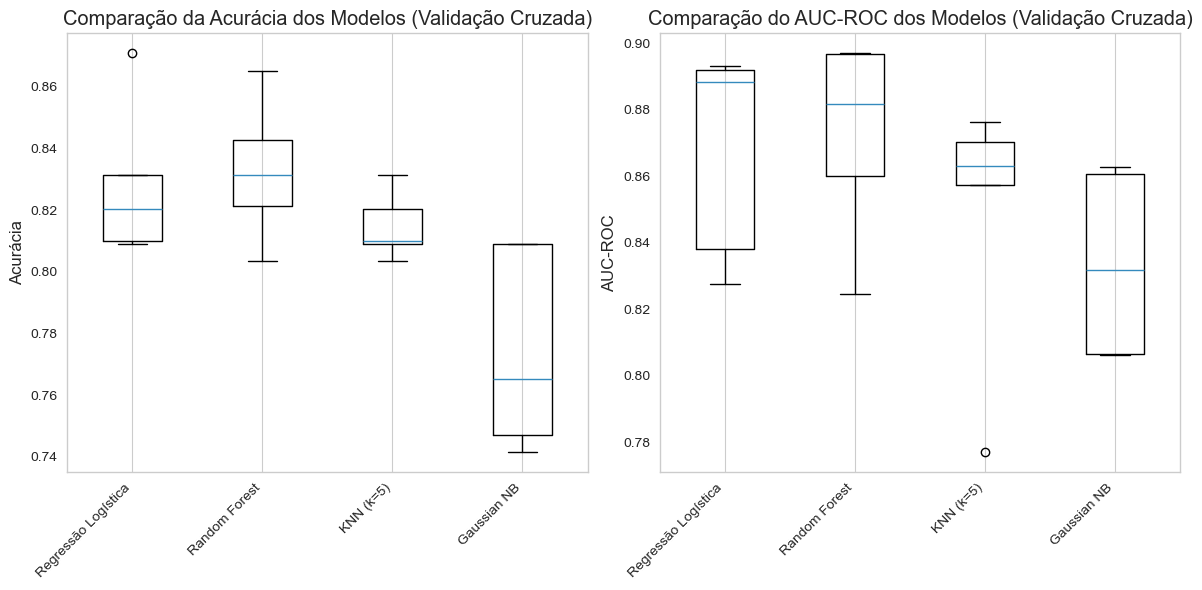

In [72]:
from sklearn.model_selection import KFold, cross_val_score

# Certifique-se de que X_final e y_final estão definidos
if 'X_final' not in globals() or 'y_final' not in globals() or y_final is None:
    print("ERRO: 'X_final' ou 'y_final' não definidos. Verifique as células 16 e 17.")
else:
    print("\n\n--- Avaliando Modelos com Validação Cruzada (K-Fold) ---")

    # Definir o número de folds (k)
    num_folds = 5 # Ou 10, um valor comum
    # random_state no KFold para garantir que os folds sejam os mesmos para todos os modelos,
    # shuffle=True para embaralhar os dados antes de dividir em folds.
    kfold = KFold(n_splits=num_folds, random_state=42, shuffle=True)

    # Lista de modelos para avaliar
    # Usaremos os mesmos modelos que instanciamos antes, com os mesmos hiperparâmetros (ou default)
    # para uma comparação mais direta com os resultados do train/test split.
    # Se você tivesse hiperparâmetros otimizados para cada um, usaria esses.
    
    # Reinstanciando os modelos para garantir que não há "vazamento" de treino anterior
    # (embora cross_val_score clone o estimador a cada fold)
    log_reg_cv = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
    rf_cv = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_leaf=5, random_state=42, class_weight='balanced')
    knn_cv = KNeighborsClassifier(n_neighbors=5) # Você pode querer testar diferentes 'k' aqui também
    gnb_cv = GaussianNB()
    # Adicione outros modelos que queira testar, como SVM:
    # from sklearn.svm import SVC
    # svc_cv = SVC(probability=True, random_state=42) # probability=True para roc_auc

    models_to_cv = [
        ('Regressão Logística', log_reg_cv),
        ('Random Forest', rf_cv),
        ('KNN (k=5)', knn_cv),
        ('Gaussian NB', gnb_cv)
        # ('SVC', svc_cv)
    ]

    results_cv = []
    names_cv = []
    
    print(f"\nMétricas de Validação Cruzada ({num_folds} folds):")
    print("----------------------------------------------------")

    for name, model in models_to_cv:
        # Acurácia
        cv_accuracy = cross_val_score(model, X_final, y_final, cv=kfold, scoring='accuracy')
        
        # AUC-ROC
        # Nem todos os scorers estão disponíveis por padrão em cross_val_score para todos os modelos
        # se predict_proba não estiver implementado ou se o modelo não o suportar diretamente.
        # probability=True é necessário para SVC, por exemplo.
        try:
            cv_roc_auc = cross_val_score(model, X_final, y_final, cv=kfold, scoring='roc_auc')
        except Exception as e:
            print(f"Não foi possível calcular roc_auc para {name} via cross_val_score: {e}")
            cv_roc_auc = np.array([np.nan] * num_folds) # Preenche com NaN se não conseguir calcular

        results_cv.append({'model': name, 'accuracy_mean': cv_accuracy.mean(), 'accuracy_std': cv_accuracy.std(),
                           'roc_auc_mean': cv_roc_auc.mean(), 'roc_auc_std': cv_roc_auc.std()})
        names_cv.append(name) # Para os boxplots depois
        
        print(f"{name}:")
        print(f"  Acurácia Média: {cv_accuracy.mean():.4f} (+/- {cv_accuracy.std():.4f})")
        print(f"  AUC-ROC Médio: {cv_roc_auc.mean():.4f} (+/- {cv_roc_auc.std():.4f})")
        print("---")

    # Criar um DataFrame com os resultados para fácil visualização
    results_df_cv = pd.DataFrame(results_cv)
    print("\nResumo dos Resultados da Validação Cruzada:")
    display(results_df_cv.sort_values(by='roc_auc_mean', ascending=False))

    # Boxplot para comparar a distribuição da acurácia dos modelos
    accuracies_all_models = []
    roc_aucs_all_models = []
    
    for name, model in models_to_cv:
        acc_scores = cross_val_score(model, X_final, y_final, cv=kfold, scoring='accuracy')
        accuracies_all_models.append(acc_scores)
        try:
            roc_scores = cross_val_score(model, X_final, y_final, cv=kfold, scoring='roc_auc')
            roc_aucs_all_models.append(roc_scores)
        except:
            roc_aucs_all_models.append(np.array([np.nan] * num_folds))


    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.boxplot(accuracies_all_models, labels=names_cv)
    plt.title('Comparação da Acurácia dos Modelos (Validação Cruzada)')
    plt.ylabel('Acurácia')
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis='y')

    plt.subplot(1, 2, 2)
    # Filtrar modelos que não tiveram roc_auc calculado para o boxplot
    valid_roc_aucs = [roc_auc for roc_auc in roc_aucs_all_models if not np.isnan(roc_auc).all()]
    valid_names_roc = [names_cv[i] for i, roc_auc in enumerate(roc_aucs_all_models) if not np.isnan(roc_auc).all()]
    if valid_roc_aucs:
        plt.boxplot(valid_roc_aucs, labels=valid_names_roc)
        plt.title('Comparação do AUC-ROC dos Modelos (Validação Cruzada)')
        plt.ylabel('AUC-ROC')
        plt.xticks(rotation=45, ha="right")
        plt.grid(axis='y')
    else:
        plt.text(0.5, 0.5, 'Nenhum AUC-ROC para plotar', horizontalalignment='center', verticalalignment='center')


    plt.tight_layout()
    plt.show()

In [73]:
# Certifique-se de que X_final, y_final e X_test_final estão definidos
if 'X_final' not in globals() or \
   'y_final' not in globals() or y_final is None or \
   'X_test_final' not in globals():
    print("ERRO: 'X_final', 'y_final' ou 'X_test_final' não definidos. Verifique as células anteriores.")
    # Adicionar lógica para parar ou lidar com isso.
    if y_final is None and 'train_labels' in globals() and train_labels is not None:
        y_final = train_labels # Tenta recuperar train_labels se foi perdido
        print("Recuperado y_final a partir de train_labels global.")
    elif y_final is None:
         raise ValueError("y_final (train_labels) não está definido. Interrompendo.")
else:
    print("--- Escolhendo e Treinando o Modelo Final com Todos os Dados de Treino ---")

    # --- Etapa de Decisão ---
    # Analise o DataFrame 'results_df_cv' da célula anterior (20.3)
    # para escolher o melhor modelo.
    # Exemplo:
    # display(results_df_cv.sort_values(by='roc_auc_mean', ascending=False))
    
    # Suponha que o Random Forest com os hiperparâmetros usados na validação cruzada
    # foi o escolhido. Se você fez GridSearchCV e encontrou melhores hiperparâmetros,
    # você usaria esses.
    
    # Modelo Escolhido: Random Forest (Exemplo)
    # Se outro modelo foi melhor (ex: Regressão Logística, KNN, GNB), ajuste aqui.
    # É importante usar os mesmos hiperparâmetros (ou os otimizados) que levaram
    # ao bom desempenho na validação cruzada.

    chosen_model_name = "Random Forest" # Mude se o seu melhor modelo for outro
    print(f"Modelo final escolhido com base na validação cruzada: {chosen_model_name}")

    if chosen_model_name == "Random Forest":
        final_model = RandomForestClassifier(
            n_estimators=100,
            max_depth=7,
            min_samples_leaf=5,
            random_state=42,
            class_weight='balanced' 
        )
    elif chosen_model_name == "Regressão Logística":
        final_model = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
    elif chosen_model_name == "KNN": # Lembre-se de qual 'k' foi melhor
        final_model = KNeighborsClassifier(n_neighbors=5) # Ajuste 'k' se necessário
    elif chosen_model_name == "Gaussian NB":
        final_model = GaussianNB()
    # Adicione aqui outros modelos se você os testou e eles foram melhores
    # elif chosen_model_name == "SVC":
    #     from sklearn.svm import SVC
    #     final_model = SVC(probability=True, random_state=42) # Adicione C, gamma, etc., se otimizados
    else:
        print(f"Modelo '{chosen_model_name}' não reconhecido para instanciação. Usando Random Forest como padrão.")
        final_model = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_leaf=5, random_state=42, class_weight='balanced')

    # Se você fez GridSearchCV e quer usar o melhor estimador dele para o modelo escolhido:
    # Ex: if chosen_model_name == "Random Forest" and 'grid_search_rf' in globals():
    #     print("Usando o melhor estimador do GridSearchCV como modelo final.")
    #     final_model = grid_search_rf.best_estimator_
    
    print(f"\nTreinando o modelo final ({chosen_model_name})...")
    final_model.fit(X_final, y_final) # Treinando com TODOS os dados de treino (X_final, y_final)
    print("Modelo final treinado.")

    # Verificação rápida (opcional): Acurácia no próprio conjunto de treino completo
    # Lembre-se que esta métrica pode ser otimista e não reflete a generalização.
    if hasattr(final_model, "predict"):
        y_pred_train_final_model = final_model.predict(X_final)
        accuracy_train_final_model = accuracy_score(y_final, y_pred_train_final_model)
        print(f"\nAcurácia do modelo final ({chosen_model_name}) no conjunto de TREINO COMPLETO: {accuracy_train_final_model:.4f}")

--- Escolhendo e Treinando o Modelo Final com Todos os Dados de Treino ---
Modelo final escolhido com base na validação cruzada: Random Forest

Treinando o modelo final (Random Forest)...
Modelo final treinado.

Acurácia do modelo final (Random Forest) no conjunto de TREINO COMPLETO: 0.8620


In [74]:
# Certifique-se de que final_model, X_test_final e passenger_id_test estão definidos
if 'final_model' not in globals():
    print("ERRO: 'final_model' não definido. Execute a célula anterior (21).")
elif 'X_test_final' not in globals():
    print("ERRO: 'X_test_final' (dados de teste processados) não definido. Verifique a célula 17.")
elif 'passenger_id_test' not in globals() or passenger_id_test is None:
    print("ERRO: 'passenger_id_test' não definido. Verifique a célula 12 (ou onde foi guardado).")
else:
    print(f"--- Gerando Previsões com o Modelo Final ({chosen_model_name if 'chosen_model_name' in globals() else 'Escolhido'}) ---")

    # Fazer previsões no conjunto de teste processado (X_test_final)
    test_predictions = final_model.predict(X_test_final)

    print("Previsões geradas para o conjunto de teste.")
    print(f"Número de previsões: {len(test_predictions)}")
    print("Primeiras 10 previsões:", test_predictions[:10]) # Mostra 0 ou 1

    # --- Criar o arquivo de submissão ---
    # O arquivo deve ter duas colunas: 'PassengerId' e 'Survived'
    # 'passenger_id_test' foi guardado na Célula 12 (ou similar).
    
    if len(passenger_id_test) == len(test_predictions):
        submission_df = pd.DataFrame({
            "PassengerId": passenger_id_test, # passenger_id_test deve ser a Series original de IDs
            "Survived": test_predictions     # Previsões do modelo (0 ou 1)
        })
        
        # Nome do arquivo de submissão
        submission_filename = 'submission/submission_05.csv'
        
        # Salvar o DataFrame como um arquivo CSV
        submission_df.to_csv(submission_filename, index=False) # index=False para não escrever o índice do DataFrame no CSV
        
        print(f"\nArquivo de submissão '{submission_filename}' criado com sucesso!")
        print("Primeiras 5 linhas do arquivo de submissão:")
        display(submission_df.head())
        
        print(f"\nTotal de passageiros no arquivo de submissão: {len(submission_df)}")
        print("Contagem de previsões de sobrevivência (0 = Não, 1 = Sim):")
        print(submission_df['Survived'].value_counts())
        
        print(f"\nLembre-se de submeter o arquivo '{submission_filename}' no Kaggle!")
    else:
        print("ERRO: O número de PassengerIds guardados não corresponde ao número de previsões geradas.")
        print(f"  Tamanho de passenger_id_test: {len(passenger_id_test)}")
        print(f"  Tamanho de test_predictions: {len(test_predictions)}")

--- Gerando Previsões com o Modelo Final (Random Forest) ---
Previsões geradas para o conjunto de teste.
Número de previsões: 418
Primeiras 10 previsões: [0 1 0 0 1 0 1 0 1 0]

Arquivo de submissão 'submission/submission_05.csv' criado com sucesso!
Primeiras 5 linhas do arquivo de submissão:


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1



Total de passageiros no arquivo de submissão: 418
Contagem de previsões de sobrevivência (0 = Não, 1 = Sim):
Survived
0    245
1    173
Name: count, dtype: int64

Lembre-se de submeter o arquivo 'submission/submission_05.csv' no Kaggle!
